In [380]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,3)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.gridspec import GridSpec
pd.set_option('display.max_columns', 100)
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go
import json
import requests
from sklearn.impute import KNNImputer
from datetime import date




In [381]:
linkedin_data_original= pd.read_csv('/Users/deepak/Downloads/dump.csv')        


In [382]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [383]:
linkedin_data_original

,Unnamed: 0,ageEstimate,companyFollowerCount,companyHasLogo,companyName,companyStaffCount,companyUrl,companyUrn,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrLocationCode,mbrTitle,memberUrn,posLocation,posLocationCode,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration
0,0,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,NaN,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361
1,1,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2014-06-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,"Sydney, Australia","urn:li:fs_region:(au,4910)",Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361
2,2,41.0,10047.0,b1c3fd9a-8f21-48f8-8321-d773b1ff3cb7-2.png,CommSec,619.0,http://www.commsec.com.au,urn:li:company:2851,500.0,au,2012-12-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240348.0,2008-08-01,760.5000,747.2308
3,3,41.0,198859.0,5a92c12e-0a20-482b-95ec-e705a6294730-2.png,Commonwealth Bank,32905.0,http://www.commbank.com.au/,urn:li:company:2848,500.0,au,2008-07-01,1.0,506.0,male,NaN,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,NaN,NaN,Project Manager,240350.0,2007-02-01,760.5000,989.9361
4,4,30.0,300723.0,0f982557-a907-409e-af20-1feb0e0813cd-2.png,PayPal,22522.0,http://www.paypal.com,urn:li:company:1482,500.0,au,NaN,1.0,951.0,female,RTMZ0-46bTjK4V_MGFDG6i5g0yZmFp5oS0S9liWvpWg.jpg,0.0,"Sydney Area, Australia","urn:li:fs_region:(au,4910)","Senior Marketing Manager, PayPal",urn:li:member:100186032,NaN,NaN,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,39532,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2009-04-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Partner,191517.0,2006-08-01,1912.0000,941.0968
39533,39533,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2007-05-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne Business Banking Centre,NaN,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01,1912.0000,941.0968
39534,39534,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2003-08-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,St Kilda Rd Melbourne & Bourke and Russell St ...,NaN,Business Banking Manager / Partner 3,191519.0,2000-06-01,1912.0000,941.0968
39535,39535,46.0,151686.0,71b7f012-183c-43c8-a9af-b39a1b9a89a0-2.png,National Australia Bank,27944.0,http://www.nab.com.au,urn:li:company:2357,362.0,au,2000-06-01,1.0,363.0,male,p_4_000_171_2aa_07c7660.jpg,0.0,"Melbourne Area, Australia","urn:li:fs_region:(au,4900)","Head Of (Distributed) Cr

In [384]:
linkedin_data_original.columns

Index(['Unnamed: 0', 'ageEstimate', 'companyFollowerCount', 'companyHasLogo',
       'companyName', 'companyStaffCount', 'companyUrl', 'companyUrn',
       'connectionsCount', 'country', 'endDate', 'followable',
       'followersCount', 'genderEstimate', 'hasPicture', 'isPremium',
       'mbrLocation', 'mbrLocationCode', 'mbrTitle', 'memberUrn',
       'posLocation', 'posLocationCode', 'posTitle', 'positionId', 'startDate',
       'avgMemberPosDuration', 'avgCompanyPosDuration'],
      dtype='object')

In [385]:
linkedin_data_original.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39537 entries, 0 to 39536
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             39537 non-null  int64  
 1   ageEstimate            39537 non-null  float64
 2   companyFollowerCount   38071 non-null  float64
 3   companyHasLogo         36407 non-null  object 
 4   companyName            39535 non-null  object 
 5   companyStaffCount      38401 non-null  float64
 6   companyUrl             37449 non-null  object 
 7   companyUrn             39537 non-null  object 
 8   connectionsCount       39537 non-null  float64
 9   country                39537 non-null  object 
 10  endDate                30626 non-null  object 
 11  followable             39537 non-null  float64
 12  followersCount         39537 non-null  float64
 13  genderEstimate         35567 non-null  object 
 14  hasPicture             29601 non-null  object 
 15  is

Observations:

There are missing values in the companyFollowerCount etc
will impute missing columns 
mix of categorical and numnerical and string types 

In [386]:
linkedin_data_original.duplicated().sum()


0

In [387]:

# Let's check for missing values in the data
round(linkedin_data_original.isnull().sum() / linkedin_data_original.isnull().count() * 100, 2)


Unnamed: 0                0.00
ageEstimate               0.00
companyFollowerCount      3.71
companyHasLogo            7.92
companyName               0.01
companyStaffCount         2.87
companyUrl                5.28
companyUrn                0.00
connectionsCount          0.00
country                   0.00
endDate                  22.54
followable                0.00
followersCount            0.00
genderEstimate           10.04
hasPicture               25.13
isPremium                 0.00
mbrLocation               0.00
mbrLocationCode           0.37
mbrTitle                  0.00
memberUrn                 0.00
posLocation              28.14
posLocationCode          57.09
posTitle                  0.00
positionId                0.00
startDate                 0.04
avgMemberPosDuration      0.57
avgCompanyPosDuration     2.15
dtype: float64

In [388]:
linkedin_data_original['endDate']=linkedin_data_original['endDate'].fillna(date.today())

##### OBSERVATIONS
#### posLocation,posLocationCode we can drop
#### impute,companyStaffCount, companyFollowerCount 
#### companyHasLogo do not drop , replace NA
## imputing company follower,staffcount,avgmember pos based on grouping

In [389]:

linkedin_data_original = linkedin_data_original.drop(['Unnamed: 0', 'posLocationCode', 'companyUrl', 
              'companyUrn','companyHasLogo','mbrLocationCode','posLocation'], axis=1)

In [392]:
linkedin_data_original[linkedin_data_original.companyName=='The Star Gold Coast'].companyFollowerCount

16          NaN
18          NaN
15647    3106.0
15649    3106.0
15650    3106.0
Name: companyFollowerCount, dtype: float64

In [394]:
linkedin_data_companystaff=linkedin_data_original.groupby('companyName').companyStaffCount.min()

In [395]:
linkedin_data_companyfollower=linkedin_data_original.groupby('companyName').agg(({'companyStaffCount':'min','companyFollowerCount':'min','avgCompanyPosDuration':'min'}))





In [396]:
linkedin_data_member=linkedin_data_original.groupby('memberUrn').agg(({'avgMemberPosDuration':'min'}))


In [397]:
cleantranscations = pd.merge(linkedin_data_companyfollower, linkedin_data_original, on='companyName')


In [398]:
cleantranscations = pd.merge(cleantranscations, linkedin_data_member, on='memberUrn')


In [399]:
cleantranscations

,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,companyFollowerCount_y,companyStaffCount_y,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x,avgCompanyPosDuration_y,avgMemberPosDuration_y
0,Eco Energy Group Ltd,1.0,3.0,730.0000,44.0,3.0,1.0,500.0,au,2022-09-21,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Contract - NSW State Sales Manager,327695.0,2017-07-01,845.80,730.0000,845.80
1,Avaya,16686.0,272335.0,1113.1341,44.0,272335.0,16686.0,500.0,au,2007-01-01,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Strategic Account Director,327702.0,2005-01-01,845.80,1113.1341,845.80
2,Checkpoint Systems,1557.0,27699.0,1114.3256,44.0,27699.0,1557.0,500.0,au,1998-12-01,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,National Sales Manager,327704.0,1995-01-01,845.80,1114.3256,845.80
3,IBM,568533.0,4385293.0,1188.7339,44.0,4385293.0,568533.0,500.0,au,2016-08-01,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Cloud Sales Specialsit & Business Development ...,327697.0,2013-11-01,845.80,1188.7339,845.80
4,IBM,568533.0,4385293.0,1188.7339,44.0,4385293.0,568533.0,500.0,au,2013-12-01,1.0,1847.0,male,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Senior Sales Specialist Systems and Technology...,327698.0,2011-08-01,845.80,1188.7339,845.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39530,hockingstuart,613.0,3366.0,1090.7874,31.0,3366.0,613.0,500.0,au,2022-09-21,1.0,1445.0,male,b4ccdf67-9b5e-4efd-9961-d223502a6f20-3.jpg,0.0,"Melbourne, Australia",Licensed Estate Agent / Senior Sales Consultan...,urn:li:member:199041981,Licensed Estate Agent / Senior Sales Consultant,219362.0,2007-05-01,NaN,1090.7874,NaN
39531,iFinance Australia,1.0,9.0,NaN,43.0,9.0,1.0,500.0,au,2022-09-21,1.0,12907.0,male,455e3d81-1be3-4c29-9869-509106764ccd-3.jpg,0.0,"Sydney, Australia",Finance Broker at iFinance Australia,urn:li:member:184577140,Finance Broker | Wealth Strategist,324688.0,2011-01-01,4748.00,NaN,4748.00
39532,sgfleet,321.0,3307.0,848.4765,47.0,3307.0,321.0,36.0,au,2022-09-21,1.0,36.0,male,NaN,0.0,"Sydney, Australia",Senior Solution Architect/Technical Lead in Fl...,urn:li:member:29867674,Senior Solution Architect/Technical Lead - Fle...,205053.0,2006-12-01,1095.75,848.4765,1095.75
39533,sgfleet,321.0,3307.0,848.4765,37.0,3307.0,321.0,155.0,au,2022-09-21,1.0,156.0,NaN,utmAgggztMkoTA7oV8QltfdkWOWkO9YeYKfJTL8UdgE.jpg,0.0,"Sydney, Australia",Lead .Net Programmer / Architect at SG Fleet,urn:li:member:37588024,Lead .Net Programmer / Architect,214037.0,2007-04-01,851.00,848.4765,851.00


## data clean 
### rremove duplicate columns and retain non null values
### impute gender values , avg for follower count 
### run regression to for has picture 
## some hypothesis with inpremium data -- member location
## replaced missing avgcompany,followercount by grouping by company, member
## then took mean if still missing


In [400]:
# gwnder 
## encode category variable (target)
import category_encoders as ce
import pandas as pd
# data=pd.DataFrame({'City':[
# 'Delhi','Mumbai','Hydrabad','Chennai','Bangalore','Delhi','Hydrabad','Bangalore','Delhi'
# ]})

#Create object for one-hot encoding
#encoder=ce.OneHotEncoder(cols='genderEstimate',handle_unknown='return_nan',return_df=True,use_cat_names=True)
encoder= ce.OrdinalEncoder(cols=['genderEstimate'],return_df=True,
                           mapping=[{'col':'genderEstimate',
'mapping':{'male':0,'female':1}}])
##Fit and transform Data
cleantranscations = encoder.fit_transform(cleantranscations)
# data_encoded




In [401]:
cleantranscations

,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,companyFollowerCount_y,companyStaffCount_y,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x,avgCompanyPosDuration_y,avgMemberPosDuration_y
0,Eco Energy Group Ltd,1.0,3.0,730.0000,44.0,3.0,1.0,500.0,au,2022-09-21,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Contract - NSW State Sales Manager,327695.0,2017-07-01,845.80,730.0000,845.80
1,Avaya,16686.0,272335.0,1113.1341,44.0,272335.0,16686.0,500.0,au,2007-01-01,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Strategic Account Director,327702.0,2005-01-01,845.80,1113.1341,845.80
2,Checkpoint Systems,1557.0,27699.0,1114.3256,44.0,27699.0,1557.0,500.0,au,1998-12-01,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,National Sales Manager,327704.0,1995-01-01,845.80,1114.3256,845.80
3,IBM,568533.0,4385293.0,1188.7339,44.0,4385293.0,568533.0,500.0,au,2016-08-01,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Cloud Sales Specialsit & Business Development ...,327697.0,2013-11-01,845.80,1188.7339,845.80
4,IBM,568533.0,4385293.0,1188.7339,44.0,4385293.0,568533.0,500.0,au,2013-12-01,1.0,1847.0,0.0,KE2Wg0xEiqLhhvzr08-Uhlp1Gn82V1SUChnbVQAxJ9g.jpg,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Senior Sales Specialist Systems and Technology...,327698.0,2011-08-01,845.80,1188.7339,845.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39530,hockingstuart,613.0,3366.0,1090.7874,31.0,3366.0,613.0,500.0,au,2022-09-21,1.0,1445.0,0.0,b4ccdf67-9b5e-4efd-9961-d223502a6f20-3.jpg,0.0,"Melbourne, Australia",Licensed Estate Agent / Senior Sales Consultan...,urn:li:member:199041981,Licensed Estate Agent / Senior Sales Consultant,219362.0,2007-05-01,NaN,1090.7874,NaN
39531,iFinance Australia,1.0,9.0,NaN,43.0,9.0,1.0,500.0,au,2022-09-21,1.0,12907.0,0.0,455e3d81-1be3-4c29-9869-509106764ccd-3.jpg,0.0,"Sydney, Australia",Finance Broker at iFinance Australia,urn:li:member:184577140,Finance Broker | Wealth Strategist,324688.0,2011-01-01,4748.00,NaN,4748.00
39532,sgfleet,321.0,3307.0,848.4765,47.0,3307.0,321.0,36.0,au,2022-09-21,1.0,36.0,0.0,NaN,0.0,"Sydney, Australia",Senior Solution Architect/Technical Lead in Fl...,urn:li:member:29867674,Senior Solution Architect/Technical Lead - Fle...,205053.0,2006-12-01,1095.75,848.4765,1095.75
39533,sgfleet,321.0,3307.0,848.4765,37.0,3307.0,321.0,155.0,au,2022-09-21,1.0,156.0,-1.0,utmAgggztMkoTA7oV8QltfdkWOWkO9YeYKfJTL8UdgE.jpg,0.0,"Sydney, Australia",Lead .Net Programmer / Architect at SG Fleet,urn:li:member:37588024,Lead .Net Programmer / Architect,214037.0,2007-04-01,851.00,848.4765,851.00


In [402]:
round(cleantranscations.isnull().sum() / cleantranscations.isnull().count() * 100, 2)

companyName                 0.00
companyStaffCount_x         2.81
companyFollowerCount_x      3.65
avgCompanyPosDuration_x     2.15
ageEstimate                 0.00
companyFollowerCount_y      3.70
companyStaffCount_y         2.87
connectionsCount            0.00
country                     0.00
endDate                     0.00
followable                  0.00
followersCount              0.00
genderEstimate              0.00
hasPicture                 25.13
isPremium                   0.00
mbrLocation                 0.00
mbrTitle                    0.00
memberUrn                   0.00
posTitle                    0.00
positionId                  0.00
startDate                   0.04
avgMemberPosDuration_x      0.57
avgCompanyPosDuration_y     2.15
avgMemberPosDuration_y      0.57
dtype: float64

In [403]:

cleantranscations=cleantranscations.drop(['companyStaffCount_y','companyFollowerCount_y','avgCompanyPosDuration_y','avgMemberPosDuration_y'], axis=1)


In [404]:
round(cleantranscations.isnull().sum() / cleantranscations.isnull().count() * 100, 2)

companyName                 0.00
companyStaffCount_x         2.81
companyFollowerCount_x      3.65
avgCompanyPosDuration_x     2.15
ageEstimate                 0.00
connectionsCount            0.00
country                     0.00
endDate                     0.00
followable                  0.00
followersCount              0.00
genderEstimate              0.00
hasPicture                 25.13
isPremium                   0.00
mbrLocation                 0.00
mbrTitle                    0.00
memberUrn                   0.00
posTitle                    0.00
positionId                  0.00
startDate                   0.04
avgMemberPosDuration_x      0.57
dtype: float64

In [405]:
cleantranscations['companyStaffCount_x'].fillna(int(cleantranscations['companyStaffCount_x'].mean()), inplace=True)
cleantranscations['companyFollowerCount_x'].fillna(int(cleantranscations['companyFollowerCount_x'].mean()), inplace=True)
cleantranscations['avgCompanyPosDuration_x'].fillna(int(cleantranscations['avgCompanyPosDuration_x'].mean()), inplace=True)
cleantranscations['avgMemberPosDuration_x'].fillna(int(cleantranscations['avgMemberPosDuration_x'].mean()), inplace=True)



In [411]:
## impute gender estimate
cleantranscations


,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x
0,Eco Energy Group Ltd,1.0,3.0,730.0000,44.0,500.0,au,2022-09-21,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Contract - NSW State Sales Manager,327695.0,2017-07-01,845.80
1,Avaya,16686.0,272335.0,1113.1341,44.0,500.0,au,2007-01-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Strategic Account Director,327702.0,2005-01-01,845.80
2,Checkpoint Systems,1557.0,27699.0,1114.3256,44.0,500.0,au,1998-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,National Sales Manager,327704.0,1995-01-01,845.80
3,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2016-08-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Cloud Sales Specialsit & Business Development ...,327697.0,2013-11-01,845.80
4,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2013-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Senior Sales Specialist Systems and Technology...,327698.0,2011-08-01,845.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39530,hockingstuart,613.0,3366.0,1090.7874,31.0,500.0,au,2022-09-21,1.0,1445.0,0.0,1,0.0,"Melbourne, Australia",Licensed Estate Agent / Senior Sales Consultan...,urn:li:member:199041981,Licensed Estate Agent / Senior Sales Consultant,219362.0,2007-05-01,875.00
39531,iFinance Australia,1.0,9.0,887.0000,43.0,500.0,au,2022-09-21,1.0,12907.0,0.0,1,0.0,"Sydney, Australia",Finance Broker at iFinance Australia,urn:li:member:184577140,Finance Broker | Wealth Strategist,324688.0,2011-01-01,4748.00
39532,sgfleet,321.0,3307.0,848.4765,47.0,36.0,au,2022-09-21,1.0,36.0,0.0,0,0.0,"Sydney, Australia",Senior Solution Architect/Technical Lead in Fl...,urn:li:member:29867674,Senior Solution Architect/Technical Lead - Fle...,205053.0,2006-12-01,1095.75
39533,sgfleet,321.0,3307.0,848.4765,37.0,155.0,au,2022-09-21,1.0,156.0,-1.0,1,0.0,"Sydney, Australia",Lead .Net Programmer / Architect at SG Fleet,urn:li:member:37588024,Lead .Net Programmer / Architect,214037.0,2007-04-01,851.00


In [410]:
## haspicture change 0 and 1 
cleantranscations['hasPicture'] = cleantranscations['hasPicture'].fillna(0)
cleantranscations.loc[cleantranscations["hasPicture"] !=0, "hasPicture"] = 1
   
# linkedin_data_copy[(linkedin_data_copy['hasPicture']!=0)].hasPicture.replace()
#cleantranscations[(cleantranscations['hasPicture']!=0)]


In [375]:
cleantranscations.isPremium.value_counts()

1.0    30316
0.0     9219
Name: isPremium, dtype: int64

correlation

In [412]:
cleantranscations

,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x
0,Eco Energy Group Ltd,1.0,3.0,730.0000,44.0,500.0,au,2022-09-21,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Contract - NSW State Sales Manager,327695.0,2017-07-01,845.80
1,Avaya,16686.0,272335.0,1113.1341,44.0,500.0,au,2007-01-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Strategic Account Director,327702.0,2005-01-01,845.80
2,Checkpoint Systems,1557.0,27699.0,1114.3256,44.0,500.0,au,1998-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,National Sales Manager,327704.0,1995-01-01,845.80
3,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2016-08-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Cloud Sales Specialsit & Business Development ...,327697.0,2013-11-01,845.80
4,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2013-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Senior Sales Specialist Systems and Technology...,327698.0,2011-08-01,845.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39530,hockingstuart,613.0,3366.0,1090.7874,31.0,500.0,au,2022-09-21,1.0,1445.0,0.0,1,0.0,"Melbourne, Australia",Licensed Estate Agent / Senior Sales Consultan...,urn:li:member:199041981,Licensed Estate Agent / Senior Sales Consultant,219362.0,2007-05-01,875.00
39531,iFinance Australia,1.0,9.0,887.0000,43.0,500.0,au,2022-09-21,1.0,12907.0,0.0,1,0.0,"Sydney, Australia",Finance Broker at iFinance Australia,urn:li:member:184577140,Finance Broker | Wealth Strategist,324688.0,2011-01-01,4748.00
39532,sgfleet,321.0,3307.0,848.4765,47.0,36.0,au,2022-09-21,1.0,36.0,0.0,0,0.0,"Sydney, Australia",Senior Solution Architect/Technical Lead in Fl...,urn:li:member:29867674,Senior Solution Architect/Technical Lead - Fle...,205053.0,2006-12-01,1095.75
39533,sgfleet,321.0,3307.0,848.4765,37.0,155.0,au,2022-09-21,1.0,156.0,-1.0,1,0.0,"Sydney, Australia",Lead .Net Programmer / Architect at SG Fleet,urn:li:member:37588024,Lead .Net Programmer / Architect,214037.0,2007-04-01,851.00


### regressions to impute the -1 gender to a real value (eother o ot 1 )

### predicting gender 

In [452]:
## separate test and prediction  data 

traindate=cleantranscations[cleantranscations.genderEstimate!=-1]

testdate=cleantranscations[cleantranscations.genderEstimate==-1]

In [428]:
# X = fish.iloc[:, 1:]
# y = fish.loc[:, 'Species']
traindate.iloc[:,]

,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x
0,Eco Energy Group Ltd,1.0,3.0,730.0000,44.0,500.0,au,2022-09-21,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Contract - NSW State Sales Manager,327695.0,2017-07-01,845.8000
1,Avaya,16686.0,272335.0,1113.1341,44.0,500.0,au,2007-01-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Strategic Account Director,327702.0,2005-01-01,845.8000
2,Checkpoint Systems,1557.0,27699.0,1114.3256,44.0,500.0,au,1998-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,National Sales Manager,327704.0,1995-01-01,845.8000
3,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2016-08-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Cloud Sales Specialsit & Business Development ...,327697.0,2013-11-01,845.8000
4,IBM,568533.0,4385293.0,1188.7339,44.0,500.0,au,2013-12-01,1.0,1847.0,0.0,1,0.0,"Sydney, Australia",Ensuring customer success for our valued Veriz...,urn:li:member:4368989,Senior Sales Specialist Systems and Technology...,327698.0,2011-08-01,845.8000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39529,headspace,976.0,14404.0,502.8195,45.0,237.0,au,2017-07-01,1.0,243.0,1.0,1,0.0,"Sydney Area, Australia",Art Therapist,urn:li:member:52783357,Art Therapist,246755.0,2017-01-01,1612.3333
39530,hockingstuart,613.0,3366.0,1090.7874,31.0,500.0,au,2022-09-21,1.0,1445.0,0.0,1,0.0,"Melbourne, Australia",Licensed Estate Agent / Senior Sales Consultan...,urn:li:member:199041981,Licensed Estate Agent / Senior Sales Consultant,219362.0,2007-05-01,875.0000
39531,iFinance Australia,1.0,9.0,887.0000,43.0,500.0,au,2022-09-21,1.0,12907.0,0.0,1,0.0,"Sydney, Australia",Finance Broker at iFinance Australia,urn:li:member:184577140,Finance Broker | Wealth Strategist,324688.0,2011-01-01,4748.0000
39532,sgfleet,321.0,3307.0,848.4765,47.0,36.0,au,2022-09-21,1.0,36.0,0.0,0,0.0,"Sydney, Australia",Senior Solution Architect/Technical Lead in Fl...,urn:li:member:29867674,Senior Solution Architect/Technical Lead - Fle...,205053.0,2006-12-01,1095.7500


In [429]:
traindateage=traindate[['ageEstimate','connectionsCount','followable','followersCount','avgMemberPosDuration_x','hasPicture']]


In [440]:
traindateage

,ageEstimate,connectionsCount,followable,followersCount,avgMemberPosDuration_x,hasPicture
0,44.0,500.0,1.0,1847.0,845.8000,1
1,44.0,500.0,1.0,1847.0,845.8000,1
2,44.0,500.0,1.0,1847.0,845.8000,1
3,44.0,500.0,1.0,1847.0,845.8000,1
4,44.0,500.0,1.0,1847.0,845.8000,1
...,...,...,...,...,...,...
39529,45.0,237.0,1.0,243.0,1612.3333,1
39530,31.0,500.0,1.0,1445.0,875.0000,1
39531,43.0,500.0,1.0,12907.0,4748.0000,1
39532,47.0,36.0,1.0,36.0,1095.7500,0


## logistic https://www.analyticsvidhya.com/blog/2021/07/an-introduction-to-logistic-regression/

In [510]:

### traindata
traincorr=traindate[['genderEstimate','ageEstimate','connectionsCount','followable','followersCount','avgMemberPosDuration_x','hasPicture']]
traincorr


,genderEstimate,ageEstimate,connectionsCount,followable,followersCount,avgMemberPosDuration_x,hasPicture
0,0.0,44.0,500.0,1.0,1847.0,845.8000,1
1,0.0,44.0,500.0,1.0,1847.0,845.8000,1
2,0.0,44.0,500.0,1.0,1847.0,845.8000,1
3,0.0,44.0,500.0,1.0,1847.0,845.8000,1
4,0.0,44.0,500.0,1.0,1847.0,845.8000,1
...,...,...,...,...,...,...,...
39529,1.0,45.0,237.0,1.0,243.0,1612.3333,1
39530,0.0,31.0,500.0,1.0,1445.0,875.0000,1
39531,0.0,43.0,500.0,1.0,12907.0,4748.0000,1
39532,0.0,47.0,36.0,1.0,36.0,1095.7500,0


<AxesSubplot:>

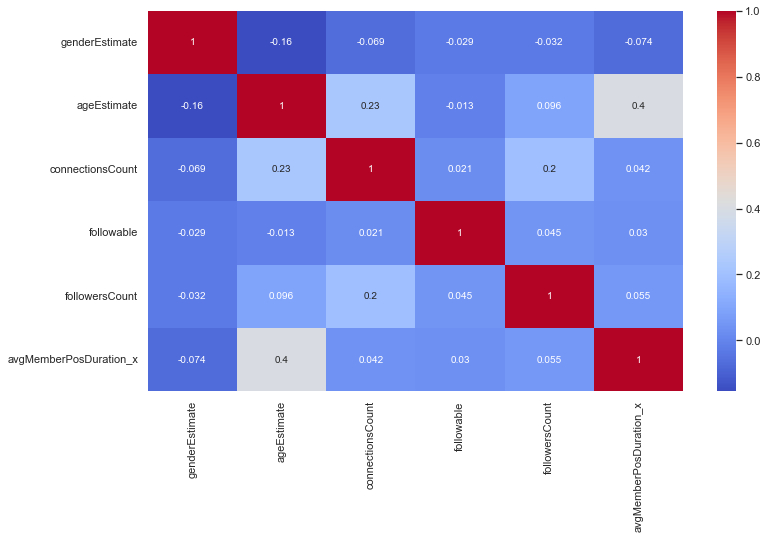

In [442]:
## corr

plt.figure(figsize = (12, 7))

sns.heatmap(traincorr.corr(), annot = True, cmap = "coolwarm")

####  ChiSq Test for gender estimate features

In [443]:
## gender estimate -- haspicture 
## has picture it is significant 
## how to put in predictor 
CrosstabResult=pd.crosstab(index=traincorr['genderEstimate'],columns=traincorr['hasPicture'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
# P-Value is the Probability of H0 being True
# If P-Value&gt;0.05 then only we Accept the assumption(H0)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])


hasPicture         0      1
genderEstimate             
0.0             5590  18242
1.0             3329   8404
The P-Value of the ChiSq Test is: 9.619982838625281e-24


In [445]:
# is premium is significant for gender 
CrosstabResult=pd.crosstab(index=traindate['genderEstimate'],columns=traindate['isPremium'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

isPremium         0.0   1.0
genderEstimate             
0.0             20429  3403
1.0             10416  1317
The P-Value of the ChiSq Test is: 1.6367598557430305e-15


In [459]:
CrosstabResult=pd.crosstab(index=traindate['genderEstimate'],columns=traindate['followable'])
print(CrosstabResult)
 
# importing the required function
from scipy.stats import chi2_contingency
 
# Performing Chi-sq test
ChiSqResult = chi2_contingency(CrosstabResult)
 
print('The P-Value of the ChiSq Test is:', ChiSqResult[1])

followable       0.0    1.0
genderEstimate             
0.0             1060  22772
1.0              677  11056
The P-Value of the ChiSq Test is: 6.18071810901945e-08


In [461]:
### anova test

########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=traindate.groupby('genderEstimate')['ageEstimate'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  2.0439724367098338e-190


In [462]:
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=traindate.groupby('genderEstimate')['connectionsCount'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  8.088999776463919e-39


In [463]:
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=traindate.groupby('genderEstimate')['avgMemberPosDuration_x'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  8.202153496484059e-44


In [464]:
## model to predict gender
traindateage

,ageEstimate,connectionsCount,followable,followersCount,avgMemberPosDuration_x,hasPicture
0,44.0,500.0,1.0,1847.0,845.8000,1
1,44.0,500.0,1.0,1847.0,845.8000,1
2,44.0,500.0,1.0,1847.0,845.8000,1
3,44.0,500.0,1.0,1847.0,845.8000,1
4,44.0,500.0,1.0,1847.0,845.8000,1
...,...,...,...,...,...,...
39529,45.0,237.0,1.0,243.0,1612.3333,1
39530,31.0,500.0,1.0,1445.0,875.0000,1
39531,43.0,500.0,1.0,12907.0,4748.0000,1
39532,47.0,36.0,1.0,36.0,1095.7500,0


In [465]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(traindateage)
traindateage_scaled = scaler.transform(traindateage)

In [466]:
#type(traindateage_scaled)
y=traindate.genderEstimate

In [467]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(traindateage_scaled,y , test_size=0.2, random_state=42)

In [468]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
# training the model
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [469]:
## accuracy of model
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 66.91%


In [ ]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cf, annot=True)
plt.xlabel('Prediction')
plt.ylabel('Target')
plt.title('Confusion Matrix')

In [470]:
from sklearn.preprocessing import MinMaxScaler
testdateanswer=testdate[['ageEstimate','connectionsCount','followable','followersCount','avgMemberPosDuration_x','hasPicture']]
scaler = MinMaxScaler()
scaler.fit(testdateanswer)
testdateanswer_scaled = scaler.transform(testdateanswer)
y_answer = clf.predict(testdateanswer_scaled)


In [476]:
y_answer

array([0., 0., 0., ..., 0., 0., 0.])

In [474]:
len(y_answer)

3970

In [475]:
testdate

,companyName,companyStaffCount_x,companyFollowerCount_x,avgCompanyPosDuration_x,ageEstimate,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration_x
179,1 AN TV,20428.0,213965.0,61.0000,23.0,318.0,au,2017-08-01,1.0,319.0,-1.0,1,1.0,"Melbourne, Australia",A global initiative paving the way to heal inh...,urn:li:member:573057783,Guest Speaker,27795707.0,2017-06-01,218.1667
180,1 AN TV,20428.0,213965.0,61.0000,23.0,318.0,au,2017-08-01,1.0,319.0,-1.0,1,1.0,"Melbourne, Australia",A global initiative paving the way to heal inh...,urn:li:member:573057783,Guest Speaker,27795708.0,2017-06-01,218.1667
181,1 AN TV,20428.0,213965.0,61.0000,23.0,318.0,au,2017-08-01,1.0,319.0,-1.0,1,1.0,"Melbourne, Australia",A global initiative paving the way to heal inh...,urn:li:member:573057783,Guest Speaker,27795709.0,2017-06-01,218.1667
182,Avrupa Koleji Okulları İnsan Kaynakları,68.0,213965.0,1018.5000,23.0,318.0,au,2015-06-01,1.0,319.0,-1.0,1,1.0,"Melbourne, Australia",A global initiative paving the way to heal inh...,urn:li:member:573057783,Head Of English Department,27795710.0,2012-08-01,218.1667
183,Utopian Endeavours Inc. Refugee Revolution.,20428.0,213965.0,92.0000,23.0,318.0,au,2016-01-01,1.0,319.0,-1.0,1,1.0,"Melbourne, Australia",A global initiative paving the way to heal inh...,urn:li:member:573057783,Chief of staff Disaster Relief delegations,243128.0,2015-10-01,218.1667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39504,Westpac,12393.0,126361.0,1078.7899,27.0,340.0,au,2022-09-21,1.0,339.0,-1.0,0,0.0,"Sydney, Australia",Deputy CFO BT Financial Group,urn:li:member:326571773,Deputy CFO BT Financial Group,24278087.0,2017-02-01,1461.0000
39505,Westpac,12393.0,126361.0,1078.7899,27.0,340.0,au,2013-12-01,1.0,339.0,-1.0,0,0.0,"Sydney, Australia",Deputy CFO BT Financial Group,urn:li:member:326571773,"Head Of Finance, Westpac Institutional Bank",24278089.0,2010-01-01,1461.0000
39525,Www.fixtertutoring.com.au,3.0,2.0,887.0000,38.0,40.0,au,2022-09-21,1.0,40.0,-1.0,1,0.0,"Queensland, Australia",APPLIED THEATRE PRACTIONER,urn:li:member:199686577,Regional Coordinator and Teacher For Kids in Care,215157.0,2016-04-01,1552.0000
39527,YMCA Victoria,798.0,4608.0,934.2750,33.0,123.0,au,2022-09-21,1.0,123.0,-1.0,0,0.0,"Ravenhall, Victoria, Australia",Early Childhood Teacher at YMCA Victoria,urn:li:member:513463947,Early Childhood Teacher,316898.0,2013-01-01,516.0000


### in premium features 

What's the % of Customers and customers that keep in with the premium  services.-- 
We can see different patterns in preimum Customers based on the type of features provided?
We have difference pattern of churn between genders ?
What's the difference between customers that pay monthly and by year?
what's the most profitable service types?
What's the amount lose in revenue?
What's the mean age of papeless customers? they are more propense to churn?
A lot of other questions that will raise trought the exploration




<AxesSubplot:>

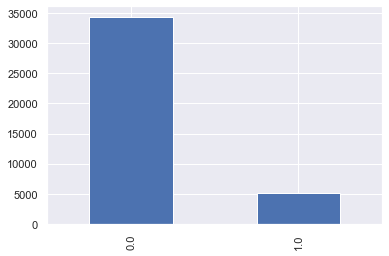

In [481]:
#What's the % of Customers and customers that keep in with the premium  services.-- 
cleantranscations.isPremium.value_counts().plot(kind='bar')

In [495]:
cleantranscations.isPremium.value_counts()/cleantranscations.isPremium.count()

0.0    0.869635
1.0    0.130365
Name: isPremium, dtype: float64

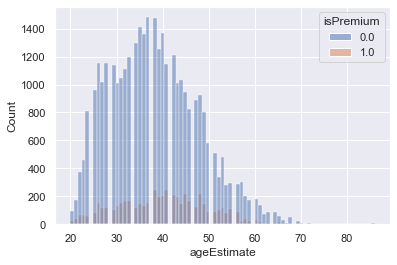

In [501]:
# ageEstimate
#cleantranscations.ageEstimate.plot.hist()
ax = sns.histplot(x = 'ageEstimate', hue = 'isPremium', data = cleantranscations)


In [509]:
ax = sns.histplot(x = 'cleantranscations[(cleantranscations['avgCompanyPosDuration_x']<1500)]', hue = 'isPremium', data = cleantranscations)


SyntaxError: invalid syntax (1771574569.py, line 1)

## FEATURE ENGINEERING

In [ ]:
linkedin_data_original['startDate'] = pd.to_datetime(linkedin_data_original['startDate'])
linkedin_data_original['endDate'] = pd.to_datetime(linkedin_data_original['endDate'])
linkedin_data_original.describe()

Observations:
CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
Customer_Age: Average age of customers is 46 years and it has a wide range from 26 to 73 years.
Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.

In [ ]:
Observations:
CLIENTNUM: It is a unique identifier for customers and can be dropped as it wouldn't add any information to our analysis.
Customer_Age: Average age of customers is 46 years and it has a wide range from 26 to 73 years.
Dependent_count: On average the customers in the data have 2 dependents and a maximum of 5 dependents.
Months_on_book: All the customers of the bank have at least been with them for a year and 50% of the customers for at least 3 years.

#### ANALYSING CATEGORICAL

In [ ]:
linkedin_data_original.describe(include=["object"]).T

In [ ]:
for i in linkedin_data_original.describe(include=["object"]).columns:
    print("Unique values in", i, "are :")
    print(linkedin_data_original[i].value_counts())
    print("*" * 50)

In [ ]:
linkedin_data_original.head()

#### ANALYSING FRATURES BY GRAPHS
#### connections count,followers : avg count 
#### ciuntry 
##### has picture,is premium - bargrpah
##### mbrLocation- density graph
##### mbr title per person -graph
#### avgMemberPosDuration,avgCompanyPosDuration -graph

# selecting criteria for premium 
#companies, employeees, jobs title 
#active vs non active customers (last date check )
#reasons to get premium
#followers count- more engagement, network increase, visibility increase  
   #followers count (high) - premium - creater mode,monteize 
#companyHasLogo- authenicity,followers less - more likely to change
#company avg - less more- likely to change
#companyStaffCount- same increase visibility in same as company connection 
#hasPicture-engagement,location- high%  of people taken premium 
#end date-- open job or not
##how oftern company changes, with titles / time :check this
#company profile: company picture,followers,url size -- premium 
#number of companies, position- frequent changer
#title- duration  - exceed than avg - more likely to change
# hypothesis with premium 

### companies analysis

In [ ]:
linkedin_data_copy=linkedin_data_original.copy()

In [ ]:
#linkedin_data_copy.companyName.value_counts()

In [ ]:
#linkedin_data_copy.companyName.nunique()

##### ~ 13000 COMPANIES

In [483]:
linkedin_data_copy.posTitle.value_counts()

Project Manager                                                                         442
Director                                                                                369
Consultant                                                                              294
Senior Consultant                                                                       230
Business Analyst                                                                        197
                                                                                       ... 
Manager - Innovation & Strategy                                                           1
Manager - eBusiness & Innovation                                                          1
Manager eBusiness                                                                         1
General Manager - eBusiness                                                               1
Various customer service roles including international services / securities off

In [484]:
# buckets , bar graph 
linkedin_data_copy.avgMemberPosDuration.value_counts()


53.3176      69
639.0000     65
1065.0000    65
609.0000     55
700.0000     51
             ..
2945.0000     1
3920.4000     1
1794.6667     1
1317.1429     1
3073.0000     1
Name: avgMemberPosDuration, Length: 4898, dtype: int64

<AxesSubplot:ylabel='Frequency'>

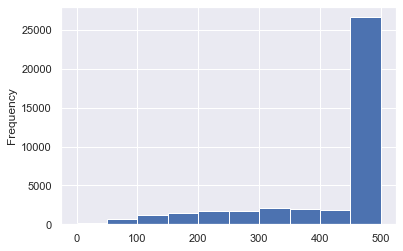

In [485]:
linkedin_data_copy.connectionsCount.value_counts()

linkedin_data_copy.connectionsCount.plot.hist()




/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/Users/deepak/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



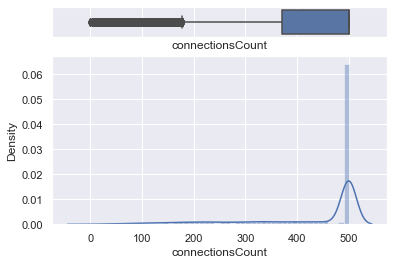

In [486]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.set(style="darkgrid")

# Add a graph in each part
sns.boxplot(linkedin_data_copy["connectionsCount"], ax=ax_box)
sns.distplot(linkedin_data_copy["connectionsCount"], ax=ax_hist)
ax_box.set(xlabel='connectionsCount')
plt.show()



#### 500 connectoins is considered on higher side, MOST PEOPLE HAVE THAT

<AxesSubplot:ylabel='Frequency'>

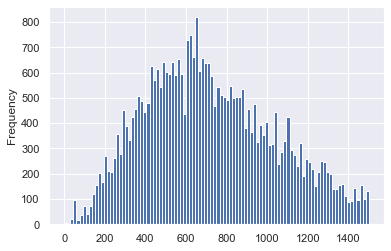

In [487]:
linkedin_data_copy[(linkedin_data_copy['avgMemberPosDuration']<1500)].avgMemberPosDuration.plot.hist(bins=100)


<AxesSubplot:ylabel='Frequency'>

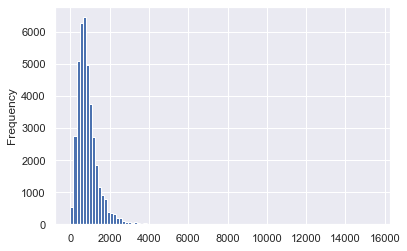

In [488]:
linkedin_data_copy.avgMemberPosDuration.plot.hist(bins=100)
# peak around 1500-2000 days , then it is right skewed 

In [489]:
linkedin_data_copy.avgMemberPosDuration.describe()

count    39312.000000
mean       875.186984
std        639.812201
min          0.000000
25%        502.125000
50%        730.600000
75%       1068.919650
max      15492.500000
Name: avgMemberPosDuration, dtype: float64

##### OBSERVATIONS
#### avgMemberPosDuration : mean is around 870 and median 730- most of the candidates around 2 years
#### after 800~ 3.5 YEARS there is downard trend - more likely cadidates will take premium after 2 years
### it is cyclical trend every year


<AxesSubplot:ylabel='Frequency'>

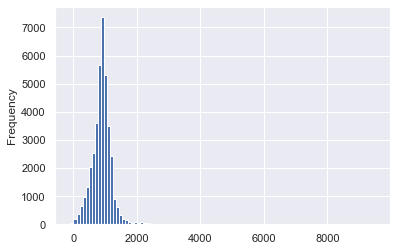

In [490]:
#some big companies will push data towards towards higher number how to balance it 
# dell vs startups 
linkedin_data_copy.avgCompanyPosDuration.plot.hist(bins=100)

<AxesSubplot:ylabel='Frequency'>

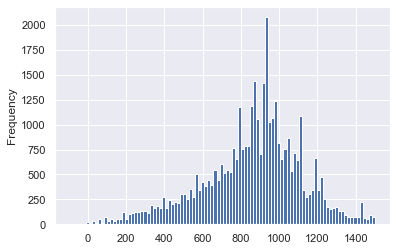

In [491]:
linkedin_data_copy[(linkedin_data_copy['avgCompanyPosDuration']<1500)].avgCompanyPosDuration.plot.hist(bins=100)


<AxesSubplot:ylabel='Frequency'>

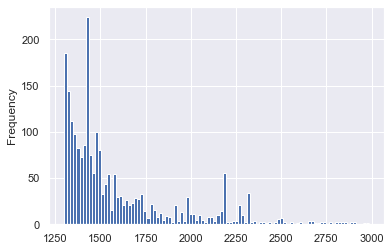

In [492]:
linkedin_data_copy[(linkedin_data_copy['avgCompanyPosDuration']>1300) & (linkedin_data_copy['avgCompanyPosDuration']<3000)].avgCompanyPosDuration.plot.hist(bins=100)




In [493]:
linkedin_data_copy.avgCompanyPosDuration.describe()

count    38686.000000
mean       888.257529
std        331.099677
min        -91.000000
25%        724.861300
50%        897.069100
75%       1039.168300
max       9497.000000
Name: avgCompanyPosDuration, dtype: float64

In [507]:
linkedin_data_copy.avgCompanyPosDuration.value_counts()

1115.0783    683
941.0968     484
989.9361     433
1188.7339    327
942.0500     253
            ... 
874.1628       1
845.8929       1
465.0909       1
1161.8696      1
777.6218       1
Name: avgCompanyPosDuration, Length: 11563, dtype: int64

#### avgCompanyPosDuration : mean is around 900 and median 900 - most of the companies employee stay is around 2.5 years
### after 2.5 years  there is downard trend - more likely cadidates will take premium after 2 years


In [502]:
# linkedin_data_copy['hasPicture'] = linkedin_data_copy['hasPicture'].fillna(0)
# linkedin_data_copy[(linkedin_data_copy['hasPicture']!=0)].hasPicture.replace()
linkedin_data_copy['hasPicture1']=linkedin_data_copy['hasPicture'].copy()
linkedin_data_copy

,ageEstimate,companyFollowerCount,companyName,companyStaffCount,connectionsCount,country,endDate,followable,followersCount,genderEstimate,hasPicture,isPremium,mbrLocation,mbrTitle,memberUrn,posTitle,positionId,startDate,avgMemberPosDuration,avgCompanyPosDuration,hasPicture1,duration
0,41.0,198859.0,Commonwealth Bank,32905.0,500.0,au,NaT,1.0,506.0,male,0,0.0,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,Portfolio Executive,240345.0,2014-07-01,760.5000,989.9361,0,NaN
1,41.0,198859.0,Commonwealth Bank,32905.0,500.0,au,2014-06-01,1.0,506.0,male,0,0.0,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,Solution Delivery Executive,240346.0,2013-11-01,760.5000,989.9361,0,212.0
2,41.0,10047.0,CommSec,619.0,500.0,au,2012-12-01,1.0,506.0,male,0,0.0,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,Project Manager,240348.0,2008-08-01,760.5000,747.2308,0,1583.0
3,41.0,198859.0,Commonwealth Bank,32905.0,500.0,au,2008-07-01,1.0,506.0,male,0,0.0,"Sydney Area, Australia",Portfolio Executive at Commonwealth Bank,urn:li:member:10013136,Project Manager,240350.0,2007-02-01,760.5000,989.9361,0,516.0
4,30.0,300723.0,PayPal,22522.0,500.0,au,NaT,1.0,951.0,female,1,0.0,"Sydney Area, Australia","Senior Marketing Manager, PayPal",urn:li:member:100186032,Senior Marketing Manager,229893.0,2017-01-01,395.2857,683.3496,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39532,46.0,151686.0,National Australia Bank,27944.0,362.0,au,2009-04-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,Senior Partner,191517.0,2006-08-01,1912.0000,941.0968,1,974.0
39533,46.0,151686.0,National Australia Bank,27944.0,362.0,au,2007-05-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,Senior Business Banking Manager / Partner 4,191518.0,2003-08-01,1912.0000,941.0968,1,1369.0
39534,46.0,151686.0,National Australia Bank,27944.0,362.0,au,2003-08-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,Business Banking Manager / Partner 3,191519.0,2000-06-01,1912.0000,941.0968,1,1156.0
39535,46.0,151686.0,National Australia Bank,27944.0,362.0,au,2000-06-01,1.0,363.0,male,1,0.0,"Melbourne Area, Australia","Head Of (Distributed) Credit, Vic/Tas at Natio...",urn:li:member:9985941,Business Banking Officer,191520.0,1995-11-01,1912.0000,941.0968,1,1674.0


In [ ]:

#linkedin_data_copy[(linkedin_data_copy['hasPicture']!=0)].loc[hasPicture=1
                                                              

In [503]:
#linkedin_data_copy=linkedin_data_copy["hasPicture"].fillna(0, inplace=True)
linkedin_data_copy['duration']=linkedin_data_copy.endDate-linkedin_data_copy.startDate
linkedin_data_copy['duration']=linkedin_data_copy['duration'].dt.days

<AxesSubplot:ylabel='Frequency'>

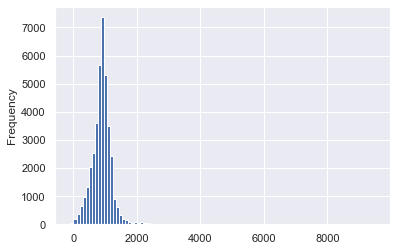

In [504]:
linkedin_data_copy.avgCompanyPosDuration.plot.hist(bins=100)
#linkedin_data_copy[(linkedin_data_copy['avgCompanyPosDuration']>1300)

<AxesSubplot:ylabel='Frequency'>

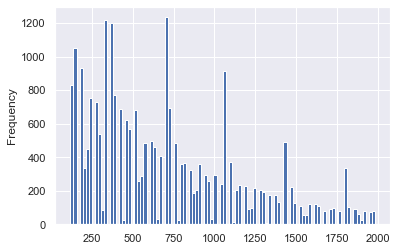

In [505]:
#linkedin_data_copy.value_counts('duration').plot.hist(bins=100)
linkedin_data_copy[(linkedin_data_copy['duration']>100) & (linkedin_data_copy['duration']<2000)].duration.plot.hist(bins=100)



#### most of the candidates leave around 2 years , then there is decline trend 
#### duration has some cyclicity to it , after a year or so 
#### candidates leave around their anniversary or so, 

#### try to make segments for marketing team ,with other features

In [506]:
linkedin_data_copy.duration.value_counts()

365.0     864
92.0      694
1065.0    631
334.0     630
700.0     604
         ... 
6089.0      1
6391.0      1
3925.0      1
4901.0      1
3714.0      1
Name: duration, Length: 747, dtype: int64

In [ ]:
#number of companies and number of title 
linkedin_user=linkedin_data_copy.groupby('memberUrn').agg({'companyName':['nunique'],'posTitle':['count']})

#transitdataseller.groupby('seller_state').agg({'freight_value':['mean'],'transit':['mean']})
linkedin_data_copy.shape

In [ ]:
linkedin_user
transcations = pd.merge(linkedin_user, linkedin_data_copy, on='memberUrn')

In [ ]:
transcations

In [ ]:
linkedin_data_copy['hasPicture']

In [ ]:
linkedin_data_copy.head()

In [ ]:
linkedin_data_copy

In [ ]:
linkedin_data_copy["hasPicture"].fillna(0, inplace=True)

linkedin_data_copy.loc[(linkedin_data_copy.hasPicture!=0),'hasPicture']='1'
#reviews.loc[(reviews.country == 'Italy') | (reviews.points >= 90)]
#reviews.loc[0, 'country']


In [ ]:
linkedin_data_copy.hasPicture.value_counts()/linkedin_data_copy.shape[0]*100


### 75%-- has picture 25 %-- do not have picture

In [ ]:
#linkedin_data_copy['end_datec']=linkedin_data_copy.endDate.copy()

In [ ]:
linkedin_data_copy

In [ ]:
#linkedin_data_copy["companyHasLogo"].fillna(0,inplace=True)

In [ ]:

#linkedin_data_copy.loc[(linkedin_data_copy.companyHasLogo!=0),'companyHasLogo']='1'

In [ ]:
linkedin_data_copy

In [ ]:
linkedin_data_copy.companyHasLogo.value_counts()/linkedin_data_copy.shape[0]*100
# most of the company has logo

In [ ]:
#linkedin_data_copy["companyHasLogo"].fillna(0,inplace=True)
linkedin_data_copy.replace({pd.NaT: "0 days"}, inplace=True)

In [ ]:
#find latest start date and check end date for each person to check job open or not

In [ ]:
linkedin_user=linkedin_data_copy.groupby('memberUrn').agg({'companyName':['nunique'],'posTitle':['count']}).reset_index()

#transitdataseller.groupby('seller_state').agg({'freight_value':['mean'],'transit':['mean']})
# linkedin_data_copy.shape
#linkedin_user
 #transcations = pd.merge(linkedin_user, linkedin_data_copy, on='memberUrn')

In [ ]:
linkedin_user.rename

In [ ]:
# linkedin_user
transcations = pd.merge(linkedin_user, linkedin_data_copy, on='memberUrn')

In [ ]:
transcations

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(transcations["duration"], ax=ax_box)
sns.distplot(transcations["duration"], ax=ax_hist)
ax_box.set(xlabel='duration')
plt.show()

In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
sns.boxplot(transcations["ageEstimate"], ax=ax_box)
sns.distplot(transcations["ageEstimate"], ax=ax_hist)
ax_box.set(xlabel='ageEstimate')
plt.show()

In [ ]:
transcations.companyHasLogo.value_counts()/transcations.shape[0]*100
# most of the company has logo 


In [ ]:
f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

sns.histplot(transcations["mbrLocation"], ax=ax_hist)
ax_box.set(xlabel='location')
plt.show()

In [ ]:
transcations.mbrLocation.value_counts().plot()

In [ ]:
transcations

In [ ]:
transcationscopy=transcations.copy()

In [ ]:
transcationscopy=transcationscopy.drop(['companyName','country','mbrLocationCode','posLocation',
                      'posTitle','positionId','hasPicture1'], axis=1)



In [ ]:
transcationscopy.isna().sum()


In [ ]:
transcationsgrp=transcationscopy.groupby('memberUrn').agg({
    'ageEstimate': 'mean', 
    'companyFollowerCount': 'first',
    'companyHasLogo':'first',
    'connectionsCount':'mean',
    'endDate': 'first', 
    'followersCount': 'mean',
    'hasPicture':'first',
    'genderEstimate':'first',
    'mbrLocation':'first',
    'avgMemberPosDuration':'mean',
    'avgCompanyPosDuration':'first',
    'isPremium':'first'
    
}).reset_index()

#transitdataseller.groupby('seller_state').agg({'freight_value':['mean'],'transit':['mean']})


In [ ]:
transcationsgrp.columns

In [ ]:
(pd.crosstab(transcationsgrp['genderEstimate'],transcationsgrp['isPremium'])).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel('gender premium %')


In [ ]:
(pd.crosstab(transcationsgrp['hasPicture'],transcationsgrp['isPremium'])).plot(kind='bar',figsize=(8,4),stacked=True)
plt.ylabel(' premium %')


In [ ]:
# end date
transcationsgrp.endDate.value_counts()/transcationsgrp.shape[0]*100


In [ ]:
transcationsgrp